## Final Project Submission

Please fill out:
* Student name: Lauren Esser
* Student pace: Full time
* Scheduled project review date/time: 
* Instructor name: James Irving
* Blog post URL:


# Introduction

Choose if I am aiming for inference or prediction purposes (in lesson 19). Must state which in the intro paragraph.


Write a paragraph summarizing notebook here


GOAL = Your target audience is non-technical people interested in using your findings to maximize their profit when selling their home. What can they do to their home to increase their homes value. Think of pitching to people who are going to be selling their homes


**NEED to WRITE MY OWN READ ME

Include:
- 3 meaningful questions(don't need to present these to non-techincal audience. Just for notebook)
- 4 meaningful data visualizations with coreesponding interpretations (make sure to label, title, and legened (when appropriate)
- Intro paragraph explaining approach to project

# Obtain Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf


In [2]:
df = pd.read_csv("kc_house_data.csv")
pd.set_option('display.max_columns', 0)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,nan,0.000,3,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,3,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,3,6,770,0.0,1933,nan,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,5,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,3,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


In [3]:
#Check for duplicates
duplicates = df[df.duplicated(subset = ['id', 'date'])]
print(len(duplicates))
duplicates.head()

0


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [4]:
df.id.sort_values()

2495        1000102
2494        1000102
6729        1200019
8404        1200021
8800        2800031
            ...    
16723    9842300095
3257     9842300485
7614     9842300540
20963    9895000040
15937    9900000190
Name: id, Length: 21597, dtype: int64

In [5]:
#drop id since it is not needed
df.drop(['id'], axis=1, inplace=True)

In [6]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.000,3,1.000,1180,5650,1.000,nan,0.000,3,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,3,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,3,6,770,0.0,1933,nan,98028,47.738,-122.233,2720,8062
3,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,5,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,3,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10), object(2)
memory usage: 3.3+ MB


Observations:
- D-Types:
    - float64 = 8
    - int64 = 10
    - object = 2 (Need to switch sqft_basement over to float)
- Missing Data:
    - waterfront
    - view
    - yr_renovated

# Scrub

### Sqft_basement

In [8]:
cat_cols = df.select_dtypes('object')
cat_cols

,date,sqft_basement
0,10/13/2014,0.0
1,12/9/2014,400.0
2,2/25/2015,0.0
3,12/9/2014,910.0
4,2/18/2015,0.0
...,...,...
21592,5/21/2014,0.0
21593,2/23/2015,0.0
21594,6/23/2014,0.0
21595,1/16/2015,0.0


In [9]:
#Look at val_counts for sqft_basement
df.sqft_basement.value_counts(dropna = False, normalize=True)

0.0      0.594
?        0.021
600.0    0.010
500.0    0.010
700.0    0.010
          ... 
3260.0   0.000
602.0    0.000
417.0    0.000
784.0    0.000
1816.0   0.000
Name: sqft_basement, Length: 304, dtype: float64

In [10]:
#replace ? with 0.0
df.sqft_basement = df.sqft_basement.replace('?', '0.0')

In [11]:
#Recheck val_counts
df.sqft_basement.value_counts(dropna = False, normalize=True)

0.0      0.615
600.0    0.010
500.0    0.010
700.0    0.010
800.0    0.009
          ... 
1275.0   0.000
875.0    0.000
2250.0   0.000
3000.0   0.000
1816.0   0.000
Name: sqft_basement, Length: 303, dtype: float64

In [12]:
#Save and convert to float
df.sqft_basement = df.sqft_basement.astype('float')

In [13]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19221.000,21534.000,21597.000,21597.000,21597.000,21597.000,21597.000,17755.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,285.717,1971.000,83.637,98077.952,47.560,-122.214,1986.620,12758.284
std,367368.140,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,439.820,29.375,399.946,53.513,0.139,0.141,685.230,27274.442
min,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,550.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


In [14]:
df.isna().sum(axis=1).value_counts()

0    15762
1     5391
2      442
3        2
dtype: int64

In [15]:
#See # of rows with over 1 Null
keep_rows = df.isna().sum(axis=1) < 2

In [16]:
df = df[keep_rows]

In [17]:
df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       1942
view               47
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3402
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### View

In [18]:
#less than 5% consider dropping
df.view.value_counts(dropna = False, normalize = True)

0.000   0.900
2.000   0.044
3.000   0.023
1.000   0.015
4.000   0.015
nan     0.002
Name: view, dtype: float64

In [19]:
# .2% deciding to drop NaN views
df.dropna(subset = ['view'], inplace=True)

### Yr_renovated

In [20]:
#Assume no reno & replace with 0
df['yr_renovated'] = df['yr_renovated'].fillna(0.0)

In [21]:
#Check NaN
df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       1942
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### Waterfront

In [22]:
#Check majority
df.waterfront.value_counts()

0.000    19019
1.000      145
Name: waterfront, dtype: int64

In [23]:
#Fill NaN with 0.0
df['waterfront'] = df['waterfront'].fillna(0.0)

In [24]:
#NaN check
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [25]:
for col in df.columns:
    try: 
        print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n')
    except:
        (print(col, df[col].value_counts()))

date 
 6/23/2014   0.007
6/25/2014   0.006
6/26/2014   0.006
7/8/2014    0.006
3/25/2015   0.006
Name: date, dtype: float64 


price 
 350000.000   0.008
450000.000   0.008
550000.000   0.007
500000.000   0.007
425000.000   0.007
Name: price, dtype: float64 


bedrooms 
 3   0.454
4   0.319
2   0.127
5   0.074
6   0.013
Name: bedrooms, dtype: float64 


bathrooms 
 2.500   0.250
1.000   0.178
1.750   0.141
2.250   0.095
2.000   0.089
Name: bathrooms, dtype: float64 


sqft_living 
 1300   0.006
1440   0.006
1400   0.006
1800   0.006
1820   0.006
Name: sqft_living, dtype: float64 


sqft_lot 
 5000   0.016
6000   0.013
4000   0.012
7200   0.010
4800   0.006
Name: sqft_lot, dtype: float64 


floors 
 1.000   0.492
2.000   0.383
1.500   0.088
3.000   0.028
2.500   0.007
Name: floors, dtype: float64 


waterfront 
 0.000   0.993
1.000   0.007
Name: waterfront, dtype: float64 


view 
 0.000   0.902
2.000   0.045
3.000   0.023
1.000   0.015
4.000   0.015
Name: view, dtype: float64 


condit

# Explore

### Identify Categoricals

In [26]:
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['date'], dtype='object')

In [27]:
num_cols = list(df.select_dtypes('number').columns)
num_cols

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

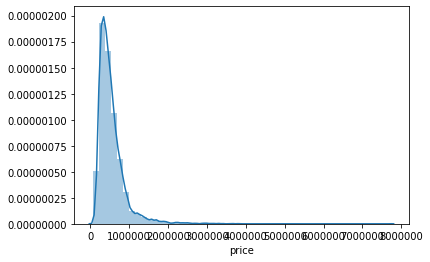

In [28]:
target = 'price'
sns.distplot(df[target])

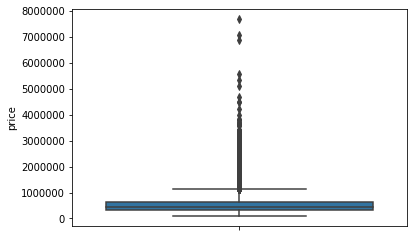

In [29]:
sns.boxplot(y= df[target])

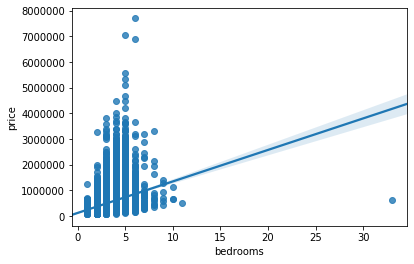

In [30]:
sns.regplot(data = df, x = 'bedrooms', y=target)

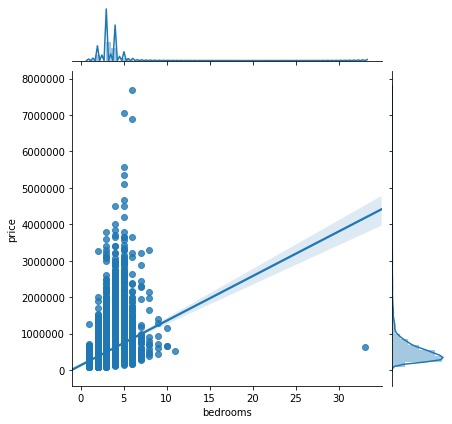

In [31]:
g = sns.jointplot(data=df, x = 'bedrooms', y=target, kind = 'reg')
fig = g.fig
ax = fig.get_axes()

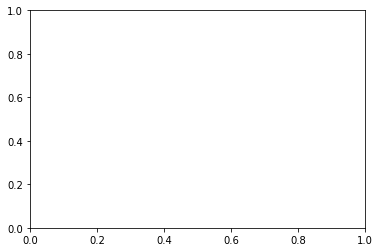

In [32]:
fig, ax = plt.subplots()

In [33]:
def plot_col(df, col, target = 'price'):
    g = sns.jointplot(data = df, x = col, y=target, kind='reg')
    plt.suptitle(f"{col} vs {target}")
    return g
    

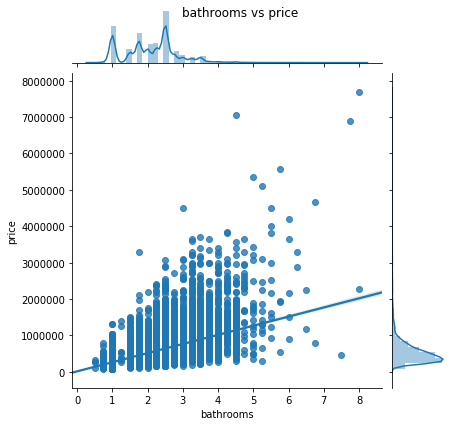

In [34]:
plot_col(df, 'bathrooms')

In [35]:
from ipywidgets import interact

In [36]:
@interact 
def show_plot(col=num_cols):
#for col in num_cols:
    plot_col(df, col)

interactive(children=(Dropdown(description='col', options=('price', 'bedrooms', 'bathrooms', 'sqft_living', 's…

Categories: floor, waterfront, view, bedrooms, condition?


condition, grade, views, bedroom, bathroom, floors, condition, waterfront?

floor, waterfront, view, bedrooms, condition


In [37]:
#transforms column. Does not have to be a category
#if needed we can encoder.inverse_transform(__Col here__)

#LABEL ENCODER
# from sklearn.preprocessing import LabelEncoder

# encoder = LabelEncoder()
# encoder.fit_transform(______________column here__________)

In [38]:
#Could also use Dummy encoding/One-Hot Encoding
# pd.get_dummies(df, columns=['colums'], drop_first=True)
#if inserting cat_col then you would get rid of brackets

R-squared

In [39]:
desire_col = list(df.drop(['price', 'date'], axis=1).columns)
formula = 'price ~ ' + '+'.join(desire_col)
model = smf.ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     2730.
Date:                Tue, 25 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:36:31   Log-Likelihood:            -2.8769e+05
No. Observations:               21106   AIC:                         5.754e+05
Df Residuals:                   21087   BIC:                         5.756e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.597e+06   2.96e+06      2.226      0.026    7.87e+05    1.24e+07
bedrooms      -3.579e+04   1921.416    -18.625      0.000   -3.96e+04    -3.2e+04
bathrooms       4.14e+04   3300.871     12.543      0.000    3.49e+04    4.79e+04
sqft_living     107.4550     18.204      5.903      0.000      71.774     143.136
sqft_lot          0.1047      0.049      2.132      0.033       0.008       0.201
floors         6609.3246   3643.820      1.814      0.070    -532.842    1.38e+04
waterfront     5.976e+05   1.83e+04     32.736      0.000    5.62e+05    6.33e+05
view           5.397e+04   2156.433     25.026      0.000    4.97e+04    5.82e+04
condition      2.688e+04   2372.252     11.332      0.000    2.22e+04    3.15e+04
grade          9.679e+04   2184.593     44.305      0.000    9.25e+04    1.01e+05
sqft_above       74.1643     18.202      4.075      0.000      38.488     109.841
sqft_basement    42.4827     18.044      2.354      0.019       7.114      77.851
yr_built      -2629.3597     72.812    -36.111      0.000   -2772.078   -2486.642
yr_renovated     23.8563      3.986      5.985      0.000      16.043      31.669
zipcode        -583.6252     33.358    -17.496      0.000    -649.010    -518.241
lat             6.02e+05   1.09e+04     55.413      0.000    5.81e+05    6.23e+05
long          -2.168e+05   1.33e+04    -16.325      0.000   -2.43e+05   -1.91e+05
sqft_living15    20.4714      3.489      5.867      0.000      13.632      27.311
sqft_lot15       -0.3720      0.074     -5.003      0.000      -0.518      -0.226
==============================================================================
Omnibus:                    17832.268   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1755977.051
Skew:                           3.536   Prob(JB):                         0.00
Kurtosis:                      47.122   Cond. No.                     2.15e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
#Drop floors since high p-val
desire_col = list(df.drop(['price', 'date', 'floors'], axis=1).columns)
formula = 'price ~ ' + '+'.join(desire_col)
model = smf.ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     2890.
Date:                Tue, 25 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:36:31   Log-Likelihood:            -2.8770e+05
No. Observations:               21106   AIC:                         5.754e+05
Df Residuals:                   21088   BIC:                         5.756e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.665e+06   2.92e+06      1.940      0.052   -5.75e+04    1.14e+07
bedrooms      -3.587e+04   1920.941    -18.674      0.000   -3.96e+04   -3.21e+04
bathrooms      4.299e+04   3182.670     13.508      0.000    3.68e+04    4.92e+04
sqft_living     105.0064     18.155      5.784      0.000      69.422     140.591
sqft_lot          0.1024      0.049      2.086      0.037       0.006       0.199
waterfront     5.977e+05   1.83e+04     32.740      0.000    5.62e+05    6.33e+05
view           5.406e+04   2155.960     25.074      0.000    4.98e+04    5.83e+04
condition      2.662e+04   2368.094     11.243      0.000     2.2e+04    3.13e+04
grade          9.715e+04   2175.803     44.648      0.000    9.29e+04    1.01e+05
sqft_above       77.6638     18.100      4.291      0.000      42.186     113.141
sqft_basement    42.4538     18.045      2.353      0.019       7.083      77.824
yr_built      -2601.0889     71.129    -36.569      0.000   -2740.507   -2461.671
yr_renovated     24.1705      3.983      6.069      0.000      16.364      31.977
zipcode        -577.9403     33.212    -17.401      0.000    -643.039    -512.841
lat            6.036e+05   1.08e+04     55.737      0.000    5.82e+05    6.25e+05
long          -2.189e+05   1.32e+04    -16.537      0.000   -2.45e+05   -1.93e+05
sqft_living15    19.7542      3.467      5.697      0.000      12.958      26.550
sqft_lot15       -0.3761      0.074     -5.061      0.000      -0.522      -0.230
==============================================================================
Omnibus:                    17782.940   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1737672.955
Skew:                           3.522   Prob(JB):                         0.00
Kurtosis:                      46.890   Cond. No.                     2.12e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

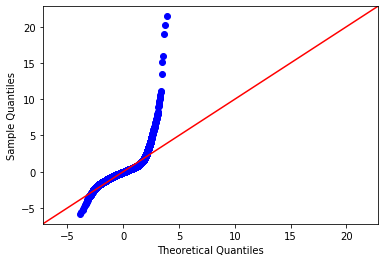

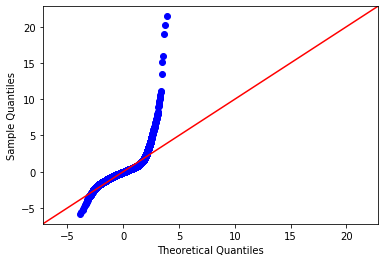

In [41]:
sm.graphics.qqplot(model.resid, fit=True, line='45')

### Check for multicollinearity

In [42]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.000,3,1.000,1180,5650,1.000,0.000,0.000,3,7,1180,0.000,1955,0.000,98178,47.511,-122.257,1340,5650
1,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,3,7,2170,400.000,1951,1991.000,98125,47.721,-122.319,1690,7639
2,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,3,6,770,0.000,1933,0.000,98028,47.738,-122.233,2720,8062
3,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,5,7,1050,910.000,1965,0.000,98136,47.521,-122.393,1360,5000
4,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,3,8,1680,0.000,1987,0.000,98074,47.617,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.000,3,2.500,1530,1131,3.000,0.000,0.000,3,8,1530,0.000,2009,0.000,98103,47.699,-122.346,1530,1509
21593,2/23/2015,400000.000,4,2.500,2310,5813,2.000,0.000,0.000,3,8,2310,0.000,2014,0.000,98146,47.511,-122.362,1830,7200
21594,6/23/2014,402101.000,2,0.750,1020,1350,2.000,0.000,0.000,3,7,1020,0.000,2009,0.000,98144,47.594,-122.299,1020,2007
21595,1/16/2015,400000.000,3,2.500,1600,2388,2.000,0.000,0.000,3,8,1600,0.000,2004,0.000,98027,47.535,-122.069,1410,1287


In [43]:
data_pred = df.iloc[:, 2: 21]
data_pred.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.000,1180,5650,1.000,0.000,0.000,3,7,1180,0.000,1955,0.000,98178,47.511,-122.257,1340,5650
1,3,2.250,2570,7242,2.000,0.000,0.000,3,7,2170,400.000,1951,1991.000,98125,47.721,-122.319,1690,7639
2,2,1.000,770,10000,1.000,0.000,0.000,3,6,770,0.000,1933,0.000,98028,47.738,-122.233,2720,8062
3,4,3.000,1960,5000,1.000,0.000,0.000,5,7,1050,910.000,1965,0.000,98136,47.521,-122.393,1360,5000
4,3,2.000,1680,8080,1.000,0.000,0.000,3,8,1680,0.000,1987,0.000,98074,47.617,-122.045,1800,7503


In [44]:
data_pred.drop(['floors'], axis=1, inplace=True)

In [45]:
data_pred.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.000,1180,5650,0.000,0.000,3,7,1180,0.000,1955,0.000,98178,47.511,-122.257,1340,5650
1,3,2.250,2570,7242,0.000,0.000,3,7,2170,400.000,1951,1991.000,98125,47.721,-122.319,1690,7639
2,2,1.000,770,10000,0.000,0.000,3,6,770,0.000,1933,0.000,98028,47.738,-122.233,2720,8062
3,4,3.000,1960,5000,0.000,0.000,5,7,1050,910.000,1965,0.000,98136,47.521,-122.393,1360,5000
4,3,2.000,1680,8080,0.000,0.000,3,8,1680,0.000,1987,0.000,98074,47.617,-122.045,1800,7503


In [46]:
data_pred.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.000,0.515,0.578,0.033,-0.004,0.078,0.025,0.358,0.480,0.296,0.155,0.018,-0.154,-0.011,0.132,0.393,0.031
bathrooms,0.515,1.000,0.755,0.090,0.062,0.187,-0.127,0.666,0.687,0.277,0.508,0.047,-0.204,0.024,0.225,0.569,0.090
sqft_living,0.578,0.755,1.000,0.176,0.103,0.282,-0.060,0.763,0.877,0.428,0.318,0.051,-0.200,0.052,0.242,0.757,0.186
sqft_lot,0.033,0.090,0.176,1.000,0.022,0.073,-0.008,0.115,0.185,0.017,0.052,0.005,-0.130,-0.086,0.231,0.146,0.721
waterfront,-0.004,0.062,0.103,0.022,1.000,0.387,0.016,0.082,0.070,0.082,-0.025,0.074,0.030,-0.012,-0.038,0.083,0.031
view,0.078,0.187,0.282,0.073,0.387,1.000,0.045,0.249,0.166,0.272,-0.055,0.092,0.086,0.006,-0.079,0.278,0.072
condition,0.025,-0.127,-0.060,-0.008,0.016,0.045,1.000,-0.147,-0.159,0.168,-0.362,-0.056,0.003,-0.015,-0.106,-0.093,-0.003
grade,0.358,0.666,0.763,0.115,0.082,0.249,-0.147,1.000,0.757,0.165,0.448,0.015,-0.185,0.113,0.200,0.713,0.122
sqft_above,0.480,0.687,0.877,0.185,0.070,0.166,-0.159,0.757,1.000,-0.051,0.424,0.020,-0.261,-0.001,0.345,0.732,0.196
sqft_basement,0.296,0.277,0.428,0.017,0.082,0.272,0.168,0.165,-0.051,1.000,-0.130,0.066,0.073,0.109,-0.141,0.199,0.017


In [47]:
abs(data_pred.corr()) > 0.75

,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,True,False,False,False,False,True,True,False,False,False,False,False,False,True,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
grade,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False
sqft_above,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [48]:
df = data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df['pairs'] = list(zip(df.level_0, df.level_1))
df.set_index(['pairs'], inplace=True)
df.drop(columns=['level_1', 'level_0'], inplace=True)
df.columns = ['cc']
df.drop_duplicates(inplace=True)

In [49]:
df[(df.cc>.75) & (df.cc< 1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.877
"(grade, sqft_living)",0.763
"(grade, sqft_above)",0.757
"(sqft_living, sqft_living15)",0.757
"(bathrooms, sqft_living)",0.755


High Correlation:
- bathroom with sqft_living 
- sqft_living with bathroom, grade, sqft_above, sqft_living15
- grade with sqft_living, sqft_above
- sqft_above with grade and sqft_living


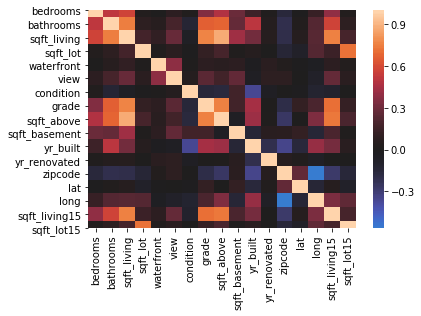

In [50]:
sns.heatmap(data_pred.corr(), center=0)

Since sqft_living is highly correlated with other columns I will choose to remove it in order to remove collinear features. I will also drop sqft_above in order to ensure removing collinearity with grade.

In [51]:
#Drop columns with high collinearity
data_pred.drop(['sqft_living', 'sqft_above'], axis=1, inplace=True)

In [52]:
data_pred.head()

,bedrooms,bathrooms,sqft_lot,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.000,5650,0.000,0.000,3,7,0.000,1955,0.000,98178,47.511,-122.257,1340,5650
1,3,2.250,7242,0.000,0.000,3,7,400.000,1951,1991.000,98125,47.721,-122.319,1690,7639
2,2,1.000,10000,0.000,0.000,3,6,0.000,1933,0.000,98028,47.738,-122.233,2720,8062
3,4,3.000,5000,0.000,0.000,5,7,910.000,1965,0.000,98136,47.521,-122.393,1360,5000
4,3,2.000,8080,0.000,0.000,3,8,0.000,1987,0.000,98074,47.617,-122.045,1800,7503


In [53]:
#Double check to ensure there is no collinearity left
df = data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df['pairs'] = list(zip(df.level_0, df.level_1))
df.set_index(['pairs'], inplace=True)
df.drop(columns=['level_1', 'level_0'], inplace=True)
df.columns = ['cc']
df.drop_duplicates(inplace=True)

In [54]:
df[(df.cc>.75) & (df.cc< 1)]

,cc
pairs,


### Check for normality

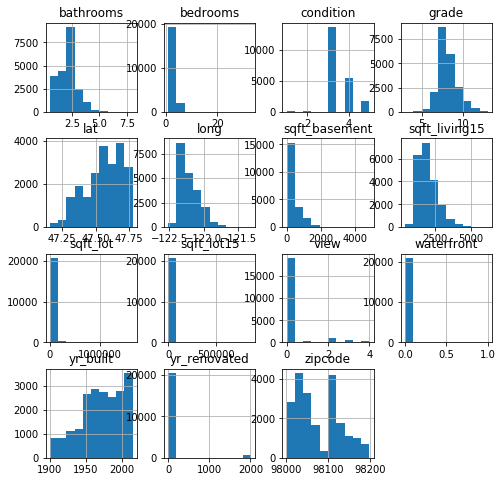

In [55]:
data_pred.hist(figsize=(8,8));

In [56]:
from scipy.stats import zscore
data_pred_z = data_pred.apply(zscore)

In [57]:
data_pred_z

,bedrooms,bathrooms,sqft_lot,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,-0.404,-1.452,-0.229,-0.083,-0.305,-0.629,-0.562,-0.649,-0.546,-0.191,1.871,-0.353,-0.306,-0.944,-0.260
1,-0.404,0.173,-0.191,-0.083,-0.305,-0.629,-0.562,0.261,-0.682,5.222,0.881,1.161,-0.746,-0.433,-0.188
2,-1.482,-1.452,-0.123,-0.083,-0.305,-0.629,-1.414,-0.649,-1.294,-0.191,-0.932,1.283,-0.136,1.070,-0.172
3,0.675,1.148,-0.245,-0.083,-0.305,2.443,-0.562,1.422,-0.206,-0.191,1.086,-0.284,-1.271,-0.915,-0.284
4,-0.404,-0.152,-0.170,-0.083,-0.305,-0.629,0.291,-0.649,0.543,-0.191,-0.072,0.409,1.199,-0.273,-0.193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,-0.404,0.498,-0.339,-0.083,-0.305,-0.629,0.291,-0.649,1.291,-0.191,0.470,1.004,-0.938,-0.667,-0.412
21593,0.675,0.498,-0.225,-0.083,-0.305,-0.629,0.291,-0.649,1.461,-0.191,1.273,-0.357,-1.051,-0.229,-0.204
21594,-1.482,-1.777,-0.334,-0.083,-0.305,-0.629,-0.562,-0.649,1.291,-0.191,1.236,0.247,-0.604,-1.411,-0.393
21595,-0.404,0.498,-0.309,-0.083,-0.305,-0.629,0.291,-0.649,1.121,-0.191,-0.951,-0.185,1.029,-0.842,-0.420


In [58]:
data_pred_col = list(data_pred)

In [59]:
def plot_z(df, col):
    g = sns.distplot(data = df, x = col)
    plt.suptitle(f"{col}")
    return g

In [60]:
@interact 
def show_plot(col=data_pred_col):
#for col in num_cols:
    plot_z(data_pred_col, data_pred_col[col])

interactive(children=(Dropdown(description='col', options=('bedrooms', 'bathrooms', 'sqft_lot', 'waterfront', …

### Identify Outliers

In [61]:
data_pred_z = data_pred.apply(zscore)

In [62]:
from scipy import stats
def find_outliers_z(data):
    zFP = np.abs(stats.zscore(data))
    zFP = pd.Series(zFP, index = data.index)
    idx_outliers = zFP > 3
    return idx_outliers

In [63]:
find_outliers_z(data_pred[col])

0        False
1        False
2        False
3        False
4        False
         ...  
21592    False
21593    False
21594    False
21595    False
21596    False
Length: 21106, dtype: bool

In [64]:
df_outliers = pd.DataFrame

In [65]:
import statsmodels.formula.api as smf
df_clean = df[~idx_outliers].copy()
df_clean

NameError: name 'idx_outliers' is not defined

In [ ]:
# f = "SalePrice-_________"
# model = smf.ols(f, df_clean).fit()
# display(model.summary())
# fig = sm.graphics.qqplot(model.resid, dist=stats, norm, fit=True, line = '45')
# fig = sm.graphics.plot_regression_exog(model, "__________", fig=plt.figure(figsize=(8,8)))

Next Steps?

- look for categories that show linear relationship to price. 
    - create a loop to go through each column to show relationship.
    -Check for multicollinearity



- Normalize data
    - do I pick features like in example project? 
    - categorical data? dummies?
- perform EDA?
    - histograms
    - KDE plots
- Model Data
    - perform ols
    - Check for multicollinearity using vif
    - Check for normality using qqplot 
    - Check for homoscedasicity using regplot 
    - Refine? How to know when to refine?
    

# Model

# Interpret